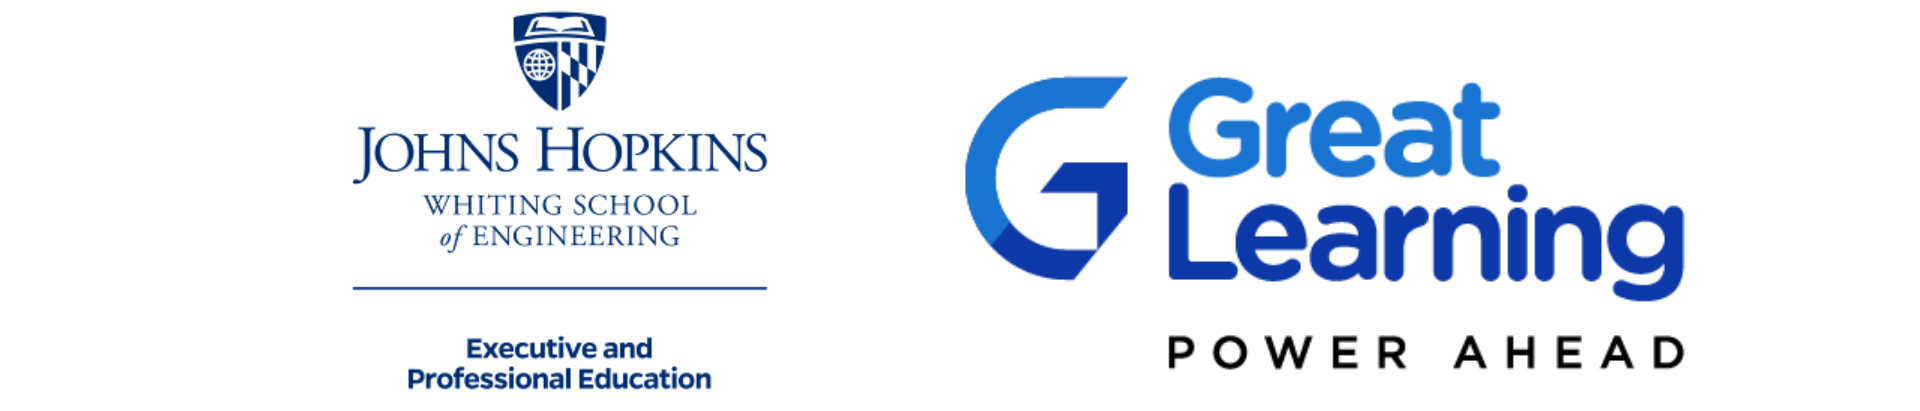

# Prompt Engineering

In this notebook, we will demonstrate the fundementals of using LangChain for prompt engineering. Specifically, we will do the following:

- create a prompt from a template
- create a LLM
- create a chain
- look at some specialized chains for few-shot prompting and for Chain-Of-Thought

For this  exercise, we are going to focus on a classification task. Namely, the classification of the "stance" of a comment towards another comment. The base comment is given below:

```python
comment = "The new Dune movie does not really capture the vision laid out by Frank Herbert. It feels like they tried to import too many visual effects that take away from the philosophy of the work."
```

The replies to the comment that we will classify for their stance toward the comment as "agree", "disagree", and "neutral" are:

```python
replies = [
    "The newer ones fail to live up to the sophistry of the older movies from the 70's.",
    "Frank Herbert wrote a lot of books.",
    "I think the new Dune movie better captures the spirit, if not the content, of Frank Herbert's philosophy.",
    "The quick red fox jumped over the lazy brown dog.",
    "Yeah, this new movie is a real masterpiece, lol!!"
]
```

## Configure the environment

I need your help with classifying the stance of replies to comments about a topic using LangChain and Langchain-Huggingface for running local models. First, I need the code to install the neccesary packages from a notebook envrionment.

In [1]:
! pip install langchain==0.3.9 \
              transformers==4.45.2 \
              langchain-huggingface==0.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of langchain-core to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of langchain-core to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.5/438.5 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.8/311.8 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 

## Create a prompt object

I need your help with classifying the stance of comments using LangChain. First, I need you to give me the code to create a prompt object, called "stance_prompt" from LangChain around the following template:
'''Please classify the stance, or opinion, of the following reply to the comment. Note that we want the stance of the reply to the comment, and not the stance of the reply to topic of the comment. Only give the stance as "agree", "disagree", or "neutral" and output no other words after outputing the label.
comment: {comment}
reply: {reply}
stance:'''

In [1]:
from langchain.prompts import PromptTemplate

# Define the template for stance classification
template = '''Please classify the stance, or opinion, of the following reply to the comment. Note that we want the stance of the reply to the comment, and not the stance of the reply to topic of the comment. Only give the stance as "agree", "disagree", or "neutral" and output no other words, only the label.
comment: {comment}
reply: {reply}
stance:'''

# Create the prompt object
stance_prompt = PromptTemplate(
    input_variables=["comment", "reply"],
    template=template
)

# Example usage of the prompt
comment = "I think this policy is not effective."
reply = "I agree, it doesn't address the core issues."
prompt = stance_prompt.format(comment=comment, reply=reply)
print(prompt)


Please classify the stance, or opinion, of the following reply to the comment. Note that we want the stance of the reply to the comment, and not the stance of the reply to topic of the comment. Only give the stance as "agree", "disagree", or "neutral" and output no other words, only the label.
comment: I think this policy is not effective.
reply: I agree, it doesn't address the core issues.
stance:


## Create an LLM object

### Option 1: Using a small encoder-decoder model
Now, I need you to create an LLM object using LangChain. In particular, I would like to use the text2text-generation model of "declare-lab/flan-alpaca-gpt4-xl" from HuggingFace and use the CPU. Make sure to import the langchain HuggingFace pipeline as "from langchain_huggingface import HuggingFacePipeline". Also, make sure when creating the pipeline to specify "max_new_tokens = 500", and make sure the pipeline only outputs the generated text and not text from the prompt.

```python
from langchain_huggingface import HuggingFacePipeline
from transformers import pipeline

# Load the model using Hugging Face pipeline
hf_pipeline = pipeline(
    "text2text-generation",
    model="declare-lab/flan-alpaca-gpt4-xl",
    device=0,  # Use GPU (-1 for CPU)
    max_new_tokens = 500,
)

# Create the LangChain LLM using the HuggingFace pipeline
llm = HuggingFacePipeline(pipeline=hf_pipeline)

# Example usage with the prompt object from before
prompt = '''Please classify the stance, or opinion, of the following reply to the comment. Only give the stance as "agree", "disagree", or "neutral" and output no other words.
comment: I think the new policy will help improve efficiency.
reply: I disagree, the policy doesn't address the real issues.
stance:'''

# Get the model's response
response = llm(prompt)
print(response)
```

### Option 2: Using a small decoder-only model
Now, I need you to create an LLM object using LangChain. In particular, I would like to use the text-generation model of "tiiuae/Falcon3-1B-Instruct" from HuggingFace and use the CPU. Make sure to import the langchain HuggingFace pipeline as "from langchain_huggingface import HuggingFacePipeline". Also, make sure when creating the pipeline to specify "max_new_tokens = 500", and make sure the pipeline only outputs the generated text and not the prompt.

```python
hf_pipeline = pipeline(
    "text-generation",
    model="tiiuae/Falcon3-1B-Instruct",
    device=0,  # Use GPU (-1 for CPU)
    max_new_tokens = 500,
    return_full_text=False
)
```

**NOTE:** You can also use the **tiiuae/Falcon3-3B-Instruct** model if you have access to a larger GPU

In [2]:
from langchain_huggingface import HuggingFacePipeline
from transformers import pipeline

# Load the model using Hugging Face pipeline
hf_pipeline = pipeline(
    "text-generation",
    model="tiiuae/Falcon3-1B-Instruct",
    device=0,  # Use GPU (-1 for CPU)
    max_new_tokens = 500,
    return_full_text=False
)

# Create the LangChain LLM using the HuggingFace pipeline
llm = HuggingFacePipeline(pipeline=hf_pipeline)

# Example usage with the prompt object from before
prompt = '''Please classify the stance, or opinion, of the following reply to the comment. Only give the stance as "agree", "disagree", or "neutral" and output no other words.
comment: I think the new policy will help improve efficiency.
reply: I disagree, the policy doesn't address the real issues.
stance:'''

# Get the model's response
response = llm(prompt)
print(response)


config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.34G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/826 [00:00<?, ?B/s]

/tmp/ipython-input-224328629.py:23: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm(prompt)
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


 disagree


## Create a Chain

Now, I would like the python code to create a LangChain Chain from the prompt template "stance_prompt" and the LLM "llm". Make sure to use the "|" syntax for defining the chain. and call the chain by the "invoke" method. Please name the chain "stance_chain".

In [15]:
stance_chain = stance_prompt | llm

# Example usage: run the chain with the provided comment and reply
comment = "I think the government should invest more in public health."
reply = "I agree that public health should be a priority."

# Format the input and get the result
result = stance_chain.invoke({"comment": comment, "reply": reply})

print(result)

 agree



Great. Now, I would like to code to run the previously defined "stance_chain" on a comment called "test_comment" across each entry in a list called "test_replies"

In [16]:
test_comment = "The new Dune movie does not really capture the vision laid out by Frank Herbert. It feels like they tried to import too many visual effects that take away from the philosophy of the work."

test_replies = [
    "The newer ones fail to live up to the sophistry of the older movies from the 70's.",
    "Frank Herbert wrote a lot of books.",
    "I think the new Dune movie better captures the spirit, if not the content, of Frank Herbert's philosophy.",
    "The quick red fox jumped over the lazy brown dog.",
    "Yeah, this new movie is a real masterpiece, lol!!"
]

In [17]:
responses = []
for reply in test_replies:
    response = stance_chain.invoke({"comment": test_comment, "reply": reply})
    responses.append(response)

# Print the results
for idx, (reply, response) in enumerate(zip(test_replies, responses)):
    print(f"Reply {idx+1}: {reply}\nStance: {response}\n")

Reply 1: The newer ones fail to live up to the sophistry of the older movies from the 70's.
Stance:  agree


Reply 2: Frank Herbert wrote a lot of books.
Stance:  neutral

Reply 3: I think the new Dune movie better captures the spirit, if not the content, of Frank Herbert's philosophy.
Stance:  disagree

Reply 4: The quick red fox jumped over the lazy brown dog.
Stance:  neutral


Reply 5: Yeah, this new movie is a real masterpiece, lol!!
Stance:  disagree




# Few-shot Prompt

Now, Please create a LangChain FewShotPromptTemplate for classifying the stance of a reply to a comment. Use the following template for each example and create an example prompt using example_prompt for the examples in the few-shot prompt template:

comment: [comment]
reply: [reply]
stance: [stance]

Then, use the following structure for the few-shot prompt:
prefix = '''Stance classification is the task of determining the expressed or implied opinion, or stance, of a reply toward a comment. The following replies express opinions about the associated comment. Each reply can either be "agree", "disagree", or "neutral" toward the comment.'''

suffix = '''Analyze the following reply to the provided comment and determine its stance. Respond with a single word: "agree", "disagree", or "neutral". Only return the stance as a single word, and no other text.
comment: {comment}
reply: {reply}
stance:'''

Create five few-shot examples with different comments and replies, including at least one for each possible stance: "agree", "disagree", and "neutral". Provide the code that constructs the FewShotPromptTemplate using the examples and the given prefix and suffix.

In [18]:
from langchain.prompts import FewShotPromptTemplate

# Define the prompt template for each example
example_template = '''comment: {comment}
reply: {reply}
stance: {stance}'''

example_prompt = PromptTemplate(
    input_variables=["comment", "reply", "stance"],
    template=example_template
)

# Define the examples with various stances
examples = [
    {'comment': "I think the new policy will help improve efficiency.",
     'reply': "I agree, it will make things more streamlined.",
     'stance': 'agree'},

    {'comment': "The new education reform seems promising.",
     'reply': "I disagree, it doesn't address the underlying issues.",
     'stance': 'disagree'},

    {'comment': "The park renovation project is a good idea.",
     'reply': "I’m not sure. It may be good, but the location is an issue.",
     'stance': 'neutral'},

    {'comment': "Artificial intelligence will revolutionize healthcare.",
     'reply': "I agree, it has the potential to save many lives.",
     'stance': 'agree'},

    {'comment': "The economy is showing signs of recovery after the pandemic.",
     'reply': "I disagree, the recovery seems to be slow and uneven.",
     'stance': 'disagree'},
]

# Define the prefix and suffix for the few-shot prompt
prefix = '''Stance classification is the task of determining the expressed or implied opinion, or stance, of a reply toward a comment. The following replies express opinions about the associated comment. Each reply can either be "agree", "disagree", or "neutral" toward the comment.'''

suffix = '''Analyze the following reply to the provided comment and determine its stance. Respond with a single word: "agree", "disagree", or "neutral". Only return the stance as a single word, and no other text.
comment: {comment}
reply: {reply}
stance:'''

# Create the FewShotPromptTemplate using the provided prefix, suffix, and examples
few_shot_prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["comment", "reply"],
    example_separator="\n"
)

# Now you can use this prompt in your LangChain pipeline

In [19]:
few_shot_chain = few_shot_prompt | llm

responses = []
for reply in test_replies:
    response = few_shot_chain.invoke({"comment": test_comment, "reply": reply})
    responses.append(response)

# Print the results
for idx, (reply, response) in enumerate(zip(test_replies, responses)):
    print(f"Reply {idx+1}: {reply}\nStance: {response}\n")

Reply 1: The newer ones fail to live up to the sophistry of the older movies from the 70's.
Stance:  disagree


Reply 2: Frank Herbert wrote a lot of books.
Stance:  neutral


Reply 3: I think the new Dune movie better captures the spirit, if not the content, of Frank Herbert's philosophy.
Stance:  agree

<|assistant|>
agree

Reply 4: The quick red fox jumped over the lazy brown dog.
Stance:  neutral


Reply 5: Yeah, this new movie is a real masterpiece, lol!!
Stance:  neutral




# Chain-of-Thought Prompt

Please generate code that uses chain-of-thought (CoT) prompting to classify the stance of a reply to a comment. The process should consist of two stages:

1. First Stage (Explanatory Step):
- Generate an explanation for the stance (agree, disagree, neutral) of the reply toward the comment.
- Use a prompt template for this step with the variables "comment" and "reply".
- Output: "stance_reason".

2. Second Stage (Final Classification Step):
- Based on the explanation from the first stage ("stance_reason"), determine the final stance of the reply.
- Use a second prompt template for this step with the variables "comment", "reply", and "stance_reason".
- Output: The final stance as "agree", "disagree", or "neutral".

Use the "RunnablePassthrough" to pass the "comment" and "reply" variables from the first chain to the second chain, and chain the steps together using the "|" operator.

In [20]:
from langchain_core.runnables import RunnablePassthrough

cot_template_1 = '''Stance classification is the task of determining the expressed or implied opinion, or stance, of the reply towards the comment.
comment: {comment}
reply: {reply}
explanation:'''

cot_prompt_1 = PromptTemplate(
    input_variables=["comment","reply"],
    template=cot_template_1
)

cot_chain_1 = cot_prompt_1 | llm

cot_template_2 ='''Therefore, based on your explanation, {stance_reason}, what is the final stance? Respond with a single word: "agree", "disagree", or "neutral". Only return the stance as a single word, and no other text.
comment: {comment}
reply: {reply}
stance:'''

cot_prompt_2 = PromptTemplate(
    input_variables=["comment","reply","stance_reason"],
    template=cot_template_2
)

cot_chain_2 = cot_prompt_2 | llm

cot_chain = {"stance_reason": cot_chain_1, "comment":RunnablePassthrough(), "reply":RunnablePassthrough()} | cot_chain_2

In [21]:
responses = []
for reply in test_replies:
    response = cot_chain.invoke({"comment": test_comment, "reply": reply})
    responses.append(response)

# Print the results
for idx, (reply, response) in enumerate(zip(test_replies, responses)):
    print(f"Reply {idx+1}: {reply}\nStance: {response}\n")

Reply 1: The newer ones fail to live up to the sophistry of the older movies from the 70's.
Stance:  'disagree'

Reply 2: Frank Herbert wrote a lot of books.
Stance:  'agree'

Reply 3: I think the new Dune movie better captures the spirit, if not the content, of Frank Herbert's philosophy.
Stance:  'agree'

Reply 4: The quick red fox jumped over the lazy brown dog.
Stance:  'negative'

Reply 5: Yeah, this new movie is a real masterpiece, lol!!
Stance:  neutral



# Tree-of-Thought Prompt

Please generate code that uses Tree-of-Thought (ToT) prompting to explore multiple reasoning paths and iteratively evaluate potential stances (agree, disagree, neutral) before making a final classification. Maintain the context of the comment and reply through all stages of reasoning and evaluation.

Steps:
Step 1 - Generate Hypotheses:
- Propose multiple possible stances (agree, disagree, neutral) based on different interpretations of the reply.
- Use a prompt template to generate each hypothesis with explanations.
- Output: hypotheses as a list.

Step 2 - Evaluate Hypotheses:
- Assess the validity of each hypothesis by critically analyzing its reasoning.
- Use an evaluation prompt template to rank or score each hypothesis based on coherence and relevance. Assign a score (1–5) for logical consistency and coherence
- Output: evaluations as scores or rankings for each hypothesis.

Step 3 - Final Decision:
- Select the hypothesis with the highest score or best reasoning and output the final stance as "agree", "disagree", or "neutral" based on the reasoning.

In [22]:
# Step 1: Generate Hypotheses
hypothesis_template = '''
Consider the following comment and reply:
comment: {comment}
reply: {reply}

Generate three different hypotheses for the stance of the reply towards the comment.
For each hypothesis, explain why the reply might:
1. Agree
2. Disagree
3. Be Neutral

Output each hypothesis clearly labeled (e.g., "Hypothesis 1: ...") with a newline between each hypothesis.'''

hypothesis_prompt = PromptTemplate(
    input_variables=["comment", "reply"],
    template=hypothesis_template
)

hypothesis_chain = hypothesis_prompt | llm

# Step 2: Evaluate Hypotheses
evaluation_template = '''
Consider the following comment and reply:
comment: {comment}
reply: {reply}

Given the following hypotheses and explanations for the stance of the reply towards the comment:
{hypotheses}

Evaluate each hypothesis based on its logical consistency and support from the reply.
Assign a numerical score from 1 to 5 for each hypothesis, where 5 is highly consistent and 1 is inconsistent. Only reply with the score and reason for that score for each hypothesis (e.g., Hypothesis 1: [score], reason: ...) and no other text.'''

evaluation_prompt = PromptTemplate(
    input_variables=["hypotheses", "comment", "reply"],
    template=evaluation_template
)

evaluation_chain = evaluation_prompt | llm

# Step 3: Final Decision
decision_template = '''
Consider the following comment and reply:
comment: {comment}
reply: {reply}

Based on the evaluations of different hypotheses for the stance of the reply towards the comment:
{hypotheses}

{evaluations}

Select the hypothesis with the highest score. Output the final stance as "agree", "disagree", or "neutral" based on the chosen hypothesis. Only output the label as single word and do not generate any other text after the label.
label:'''

decision_prompt = PromptTemplate(
    input_variables=["hypotheses", "evaluations", "comment", "reply"],
    template=decision_template
)

decision_chain = decision_prompt | llm

# Combine the chains into a Tree-of-Thought pipeline
tot_chain = {
    "hypotheses": hypothesis_chain,
    "comment": RunnablePassthrough(),
    "reply": RunnablePassthrough()
} | RunnablePassthrough.assign(evaluations = evaluation_chain) | decision_chain

In [23]:
responses = []
for reply in test_replies:
    response = tot_chain.invoke({"comment": test_comment, "reply": reply})
    responses.append(response)

# Print results
for idx, (reply, response) in enumerate(zip(test_replies, responses)):
    print(f"Reply {idx+1}: {reply}\nStance: {response}\n")

Reply 1: The newer ones fail to live up to the sophistry of the older movies from the 70's.
Stance:  "agree"

Reply 2: Frank Herbert wrote a lot of books.
Stance:  agree

Reply 3: I think the new Dune movie better captures the spirit, if not the content, of Frank Herbert's philosophy.
Stance:  agree

Reply 4: The quick red fox jumped over the lazy brown dog.
Stance:  agree

Reply 5: Yeah, this new movie is a real masterpiece, lol!!
Stance:  "agree"

```output
agree
```



# Self-Consistency Prompt

Given the final stance labels from multiple reasoning approaches—Tree-of-Thought (ToT), Chain-of-Thought (CoT), Few-Shot prompting, and Task-only approach—determine the final stance label ("agree", "disagree", or "neutral") by synthesizing the outputs.

Inputs:
- Comment and Reply: The context for determining the stance.
- Stance Labels from the four approaches:
    - tot_output: Stance label from the Tree-of-Thought (ToT) approach.
    - cot_output: Stance label from the Chain-of-Thought (CoT) approach.
    - few_shot_output: Stance label from the Few-Shot prompting approach.
    - task_output: Stance label from the Task-only approach.

Steps:
1. Compare the stance labels from the four approaches.
2. Identify patterns of agreement or disagreement:
- If there is a majority consensus, select that stance label.
- If there is no clear majority, resolve the inconsistencies by choosing the most consistent or compelling label based on the distribution of outputs.
3. Output: A final stance label of "agree", "disagree", or "neutral", based on the most consistent or majority label. Only output the label, with no additional explanation.

In [24]:
# Self-Consistency Prompt Template
consistency_template = '''
Consider the following comment and reply:
comment: {comment}
reply: {reply}

You have been provided with stance outputs generated by four different approaches:
1. Tree-of-Thought (ToT) approach: {tot_output}
2. Chain-of-Thought (CoT) approach: {cot_output}
3. Few-Shot approach: {few_shot_output}
4. Task-only approach: {task_output}

Compare these outputs and determine the most likely stance label. Output the final stance label as "agree", "disagree", or "neutral" based on the most consistency across the responses. Only output the label as single word and do not generate any other text after the label.
'''

consistency_prompt = PromptTemplate(
    input_variables=["comment", "reply", "tot_output", "cot_output", "few_shot_output", "task_output"],
    template=consistency_template
)

self_evaluation_chain = consistency_prompt | llm

# Combine chains into a pipeline with pass-through variables
consistency_chain = {
    "tot_output": tot_chain,
    "cot_output": cot_chain,
    "few_shot_output": few_shot_chain,
    "task_output": stance_chain,
    "comment": RunnablePassthrough(),
    "reply": RunnablePassthrough()
} | self_evaluation_chain

In [25]:
responses = []
for reply in test_replies:
    response = consistency_chain.invoke({"comment": test_comment, "reply": reply})
    responses.append(response)

# Print results
for idx, (reply, response) in enumerate(zip(test_replies, responses)):
    print(f"Reply {idx+1}: {reply}\nStance: {response}\n")

Reply 1: The newer ones fail to live up to the sophistry of the older movies from the 70's.
Stance: 
<|assistant|>
neutral

Reply 2: Frank Herbert wrote a lot of books.
Stance: 
<|assistant|>
neutral

Reply 3: I think the new Dune movie better captures the spirit, if not the content, of Frank Herbert's philosophy.
Stance: 
neutral

Reply 4: The quick red fox jumped over the lazy brown dog.
Stance: 
<|assistant|>
neutral

Reply 5: Yeah, this new movie is a real masterpiece, lol!!
Stance: 
<|assistant|>
neutral

